## Notes:

- Target class has 2 values -> 0 or 1

    -> 0 refers to edible
    
    -> 1 refers to poisonous 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/mushroom_cleaned.csv")

print(df)

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  class  
0            1545          11  1.80427

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


## We need to count the number of positives and negatives

In [5]:
df["class"].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

## Realization: data skew is heavy towards poisonous so this will affect model accuracy

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [8]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 54035, dtype: int64

In [9]:
# Split data into testing and training data such that we have 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=42) 

In [10]:
X_train = np.array(X_train, dtype=np.float64)

In [11]:
y_train = np.array(y_train, dtype=np.float64)

## We make our own Logistic Regression model from scratch instead of using pre-built model

In [12]:
class LogisticRegressionModel():
    def __init__(self, learning_rate, num_iters):
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # need to map N_SAMPLES to the rows and N_FEATURES to the cols
        n_samples, n_features = np.shape(X)
        # originally intiialize Wn to be 0 for each feature
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iters):
            # calculate our linear predictions (z = wx + b) to be passed into sigmoid
            linear_predictions = np.dot(X, self.weights) + self.bias
            # calculate our actual predictions (f_wb) using sigmoid for linear_predicts
            predictions = self.sigmoid(linear_predictions)

            # calculting the gradients for w and b
            dw = (1 / 2 * n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / 2 * n_samples) * np.sum(predictions - y)

            # updating w and b
            # w = w - alpha * dw, b = b - alpha * db
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict_probabilites(self, X):
        linear_preds = np.dot(X, self.weights) + self.bias
        y_predicted_probabilites = self.sigmoid(linear_preds)
        return np.array(y_predicted_probabilites)

    def predict(self, X):
        # same code as above
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_predictions)

        class_prediction = []
        # threshold
        for _ in range(len(y_pred)):
            if y_pred[_] < 0.5: class_prediction.append(0)
            if y_pred[_] >= 0.5: class_prediction.append(1)
        return class_prediction
    
    def get_accuracy(self, y_predictions, y_test):
        return np.sum(y_predictions == y_test) /  len(y_test)

In [13]:
classifier = LogisticRegressionModel(learning_rate=0.01, num_iters=1000)
classifier.fit(X_train, y_train)

C:\Users\zayaa\AppData\Local\Temp\ipykernel_20468\602505756.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [14]:
y_predictions = classifier.predict(X_test)

C:\Users\zayaa\AppData\Local\Temp\ipykernel_20468\602505756.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [15]:
y_predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
len(y_predictions)
print()

y_predictions = np.array(y_predictions)

y_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
edible_count = 0
poisonous_count = 0

for i in range(len(y_predictions)):
    if y_predictions[i] == 0:
        edible_count += 1
    else:
        poisonous_count += 1

In [18]:
print("Edible:", edible_count)
print("Poisonous:", poisonous_count) # skew is heavy towards poisonous

Edible: 271
Poisonous: 10536


In [19]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predictions)

confusion_matrix

array([[  65, 4844],
       [ 206, 5692]], dtype=int64)

## Let us print the accuracy

In [20]:
accuracy = metrics.accuracy_score(y_test, y_predictions)

accuracy

0.5327102803738317

## we can see based on the accuracy of 53% that logistic regression may not be the best fit for this data

In [21]:
print(np.bincount(y))

[24360 29675]


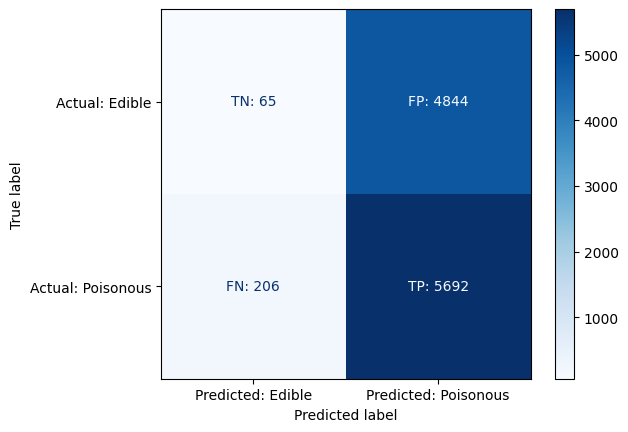

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
labels = ['Edible', 'Poisonous']

display_confusion_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
display_confusion_matrix.plot(cmap="Blues", ax=ax)

ax.set_xticklabels(["Predicted: Edible", "Predicted: Poisonous"])
ax.set_yticklabels(["Actual: Edible", "Actual: Poisonous"])

# Adjusting the confusion matrix annotations for TP, FN, FP, TN
ax.texts[0].set_text(f'TN: {confusion_matrix[0, 0]}')
ax.texts[1].set_text(f'FP: {confusion_matrix[0, 1]}')
ax.texts[2].set_text(f'FN: {confusion_matrix[1, 0]}')
ax.texts[3].set_text(f'TP: {confusion_matrix[1, 1]}')


## Using the built in LogisticRegression model we get a different accuracy

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(max_iter=1000, penalty=None)
model.fit(X_train, y_train)
print(model.coef_)

model_predicts = model.predict(X_train)

pre_built_acc = accuracy_score(y_train, model_predicts)
print("Accuracy of prebuilt:", pre_built_acc)

[[-3.44400271e-04 -8.58911204e-02  1.19140268e-02 -8.02156444e-03
   7.30014112e-01 -3.45036921e-04 -6.77275983e-02 -4.69528046e-01]]
Accuracy of prebuilt: 0.6349588229851022
